In [1]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [2]:
train_data= pd.read_csv('train.csv') 
train_data

,loan_amnt,funded_amnt,pymnt_plan,grade,sub_grade_num,short_emp,emp_length_num,home_ownership,dti,purpose,...,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,open_acc,pub_rec,pub_rec_zero,revol_util,bad_loans
0,5000,5000,n,B,0.4,0,11,RENT,27.65,credit_card,...,0.0,1.0,1.0,1,1,3.0,0.0,1.0,83.7,0
1,2400,2400,n,C,1.0,0,11,RENT,8.72,small_business,...,0.0,1.0,2.0,1,1,2.0,0.0,1.0,98.5,0
2,5000,5000,n,A,0.8,0,4,RENT,11.20,wedding,...,0.0,1.0,3.0,1,1,9.0,0.0,1.0,28.3,0
3,3000,3000,n,E,0.2,0,10,RENT,5.35,car,...,0.0,1.0,2.0,1,1,4.0,0.0,1.0,87.5,0
4,5600,5600,n,F,0.4,0,5,OWN,5.55,small_business,...,0.0,1.0,2.0,1,1,11.0,0.0,1.0,32.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81733,24000,24000,n,G,0.4,0,11,MORTGAGE,26.27,medical,...,1.0,0.0,0.0,0,0,12.0,0.0,1.0,94.1,0
81734,6000,6000,n,D,0.6,1,1,RENT,6.41,other,...,0.0,1.0,2.0,0,1,9.0,0.0,1.0,55.9,0
81735,6000,6000,n,B,1.0,0,5,MORTGAGE,18.69,debt_consolidation,...,1.0,0.0,2.0,0,1,14.0,0.0,1.0,29.5,1
81736,15250,15250,n,D,0.4,0,11,MORTGAGE,11.26,debt_consolidation,...,1.0,0.0,2.0,0,0,8.0,2.0,0.0,15.2,0


In [25]:
train_data['bad_loans'].value_counts()

bad_loans
0    66266
1    15472
Name: count, dtype: int64

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81738 entries, 0 to 81737
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amnt              81738 non-null  int64  
 1   funded_amnt            81738 non-null  int64  
 2   pymnt_plan             81738 non-null  object 
 3   grade                  81738 non-null  object 
 4   sub_grade_num          81738 non-null  float64
 5   short_emp              81738 non-null  int64  
 6   emp_length_num         81738 non-null  int64  
 7   home_ownership         81738 non-null  object 
 8   dti                    81738 non-null  float64
 9   purpose                81738 non-null  object 
 10  payment_inc_ratio      81737 non-null  float64
 11  delinq_2yrs            81722 non-null  float64
 12  delinq_2yrs_zero       81722 non-null  float64
 13  inq_last_6mths         81722 non-null  float64
 14  last_delinq_none       81738 non-null  int64  
 15  la

In [5]:
train_data.isnull().sum()

loan_amnt                 0
funded_amnt               0
pymnt_plan                0
grade                     0
sub_grade_num             0
short_emp                 0
emp_length_num            0
home_ownership            0
dti                       0
purpose                   0
payment_inc_ratio         1
delinq_2yrs              16
delinq_2yrs_zero         16
inq_last_6mths           16
last_delinq_none          0
last_major_derog_none     0
open_acc                 16
pub_rec                  16
pub_rec_zero             16
revol_util                0
bad_loans                 0
dtype: int64

In [7]:
label_encoder = LabelEncoder()

object_cols = train_data.select_dtypes(include=['object']).columns

# تبدیل هر ستون object به مقادیر عددی
for col in object_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])

train_data


,loan_amnt,funded_amnt,pymnt_plan,grade,sub_grade_num,short_emp,emp_length_num,home_ownership,dti,purpose,...,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,open_acc,pub_rec,pub_rec_zero,revol_util,bad_loans
0,5000,5000,0,1,0.4,0,11,3,27.65,1,...,0.0,1.0,1.0,1,1,3.0,0.0,1.0,83.7,0
1,2400,2400,0,2,1.0,0,11,3,8.72,9,...,0.0,1.0,2.0,1,1,2.0,0.0,1.0,98.5,0
2,5000,5000,0,0,0.8,0,4,3,11.20,11,...,0.0,1.0,3.0,1,1,9.0,0.0,1.0,28.3,0
3,3000,3000,0,4,0.2,0,10,3,5.35,0,...,0.0,1.0,2.0,1,1,4.0,0.0,1.0,87.5,0
4,5600,5600,0,5,0.4,0,5,2,5.55,9,...,0.0,1.0,2.0,1,1,11.0,0.0,1.0,32.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81733,24000,24000,0,6,0.4,0,11,0,26.27,6,...,1.0,0.0,0.0,0,0,12.0,0.0,1.0,94.1,0
81734,6000,6000,0,3,0.6,1,1,3,6.41,8,...,0.0,1.0,2.0,0,1,9.0,0.0,1.0,55.9,0
81735,6000,6000,0,1,1.0,0,5,0,18.69,2,...,1.0,0.0,2.0,0,1,14.0,0.0,1.0,29.5,1
81736,15250,15250,0,3,0.4,0,11,0,11.26,2,...,1.0,0.0,2.0,0,0,8.0,2.0,0.0,15.2,0


In [8]:
train_data=train_data.fillna(train_data.mean())

Text(0.5, 1.05, 'Heatmap Plot')

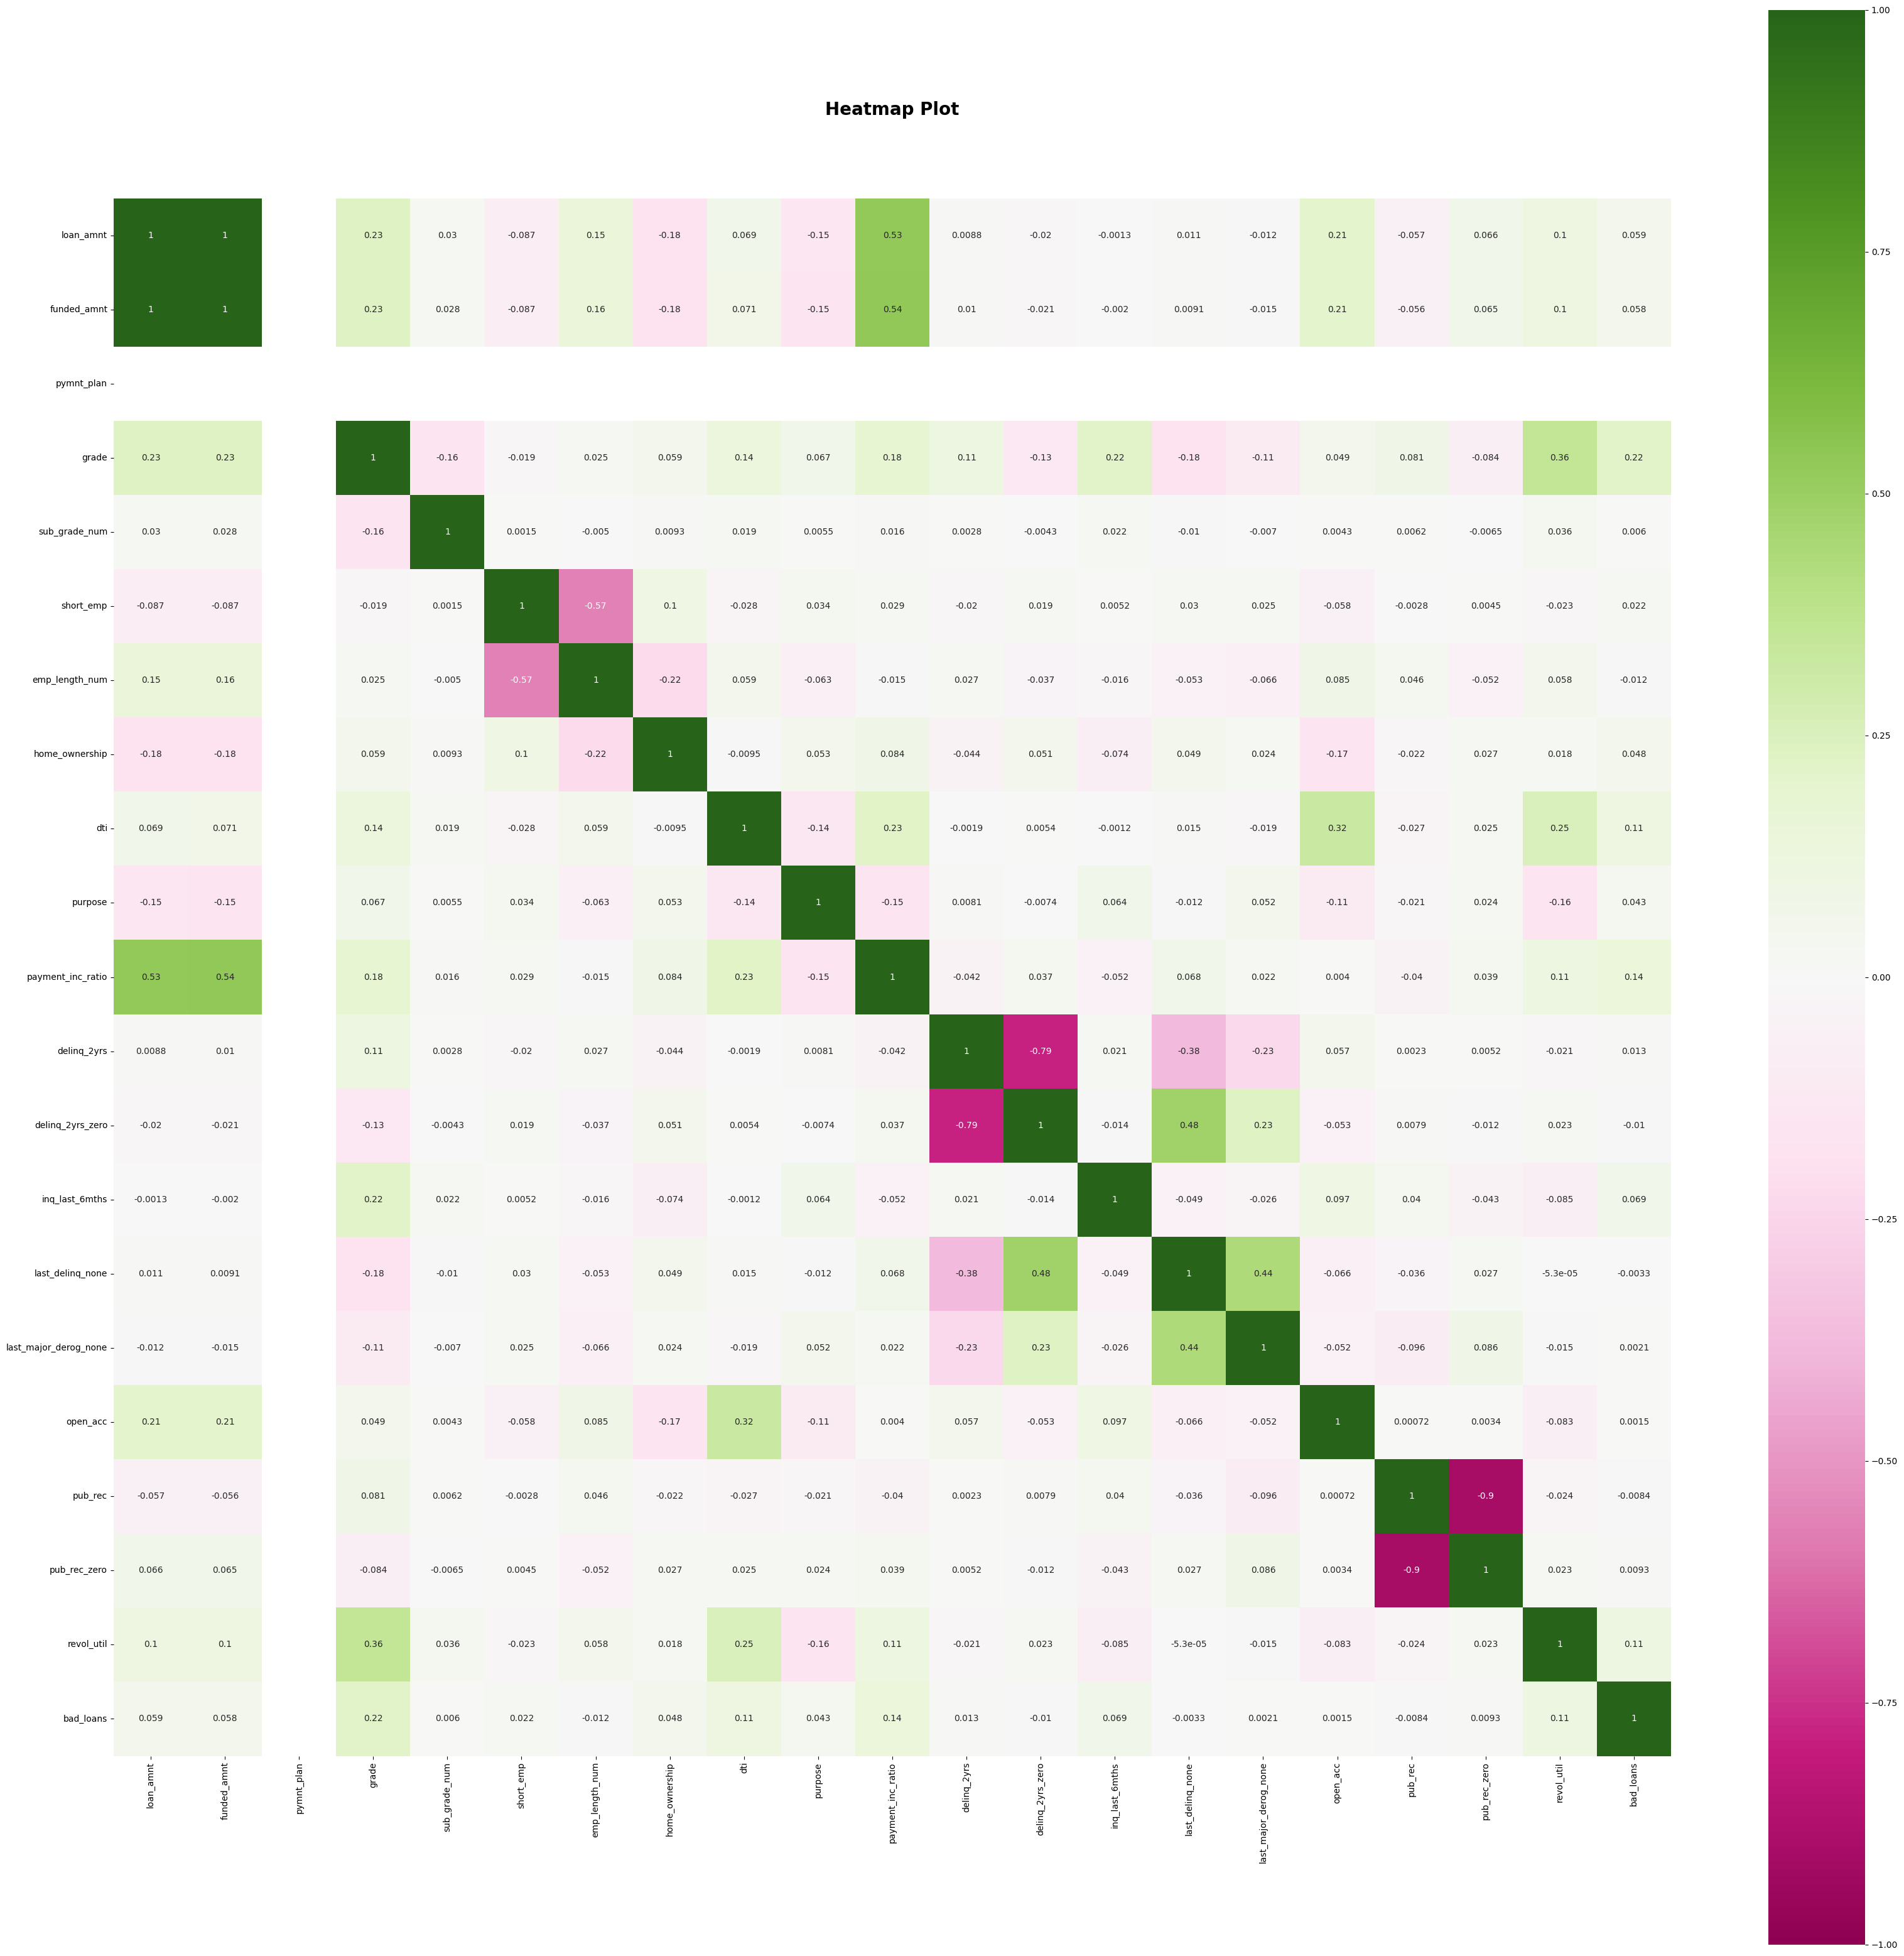

In [9]:
plt.figure(figsize=(40,40))
sns.heatmap(train_data.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='PiYG',
            annot=True,
            square=True);
plt.title('Heatmap Plot',fontsize=20, fontweight='bold', y=1.05)


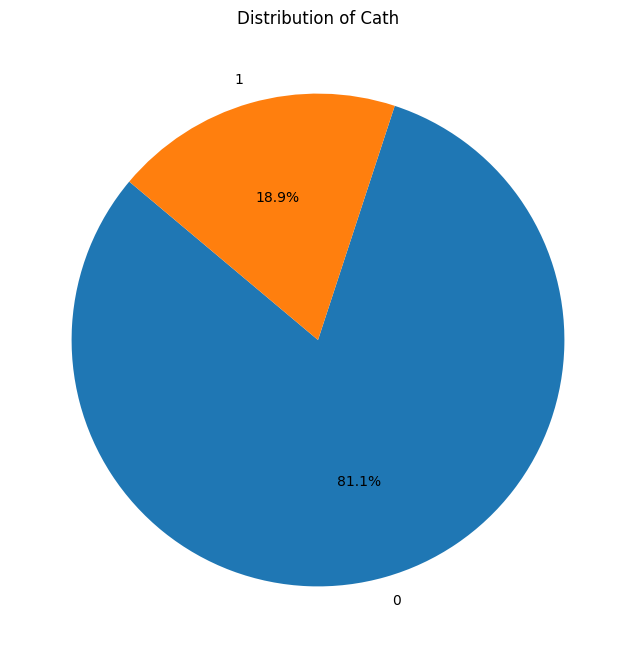

In [10]:
plt.figure(figsize=(8, 8))
plt.pie(train_data['bad_loans'].value_counts(), labels=train_data['bad_loans'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cath')
plt.show()

In [37]:
test_data = pd.read_csv('test.csv')               

test_data

,loan_amnt,funded_amnt,pymnt_plan,grade,sub_grade_num,short_emp,emp_length_num,home_ownership,dti,purpose,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,open_acc,pub_rec,pub_rec_zero,revol_util
0,3600,3600,n,B,0.2,0,11,RENT,15.37,car,2.27848,0.0,1.0,0.0,1,1,9.0,0.0,1.0,82.9
1,8875,8875,n,C,0.4,0,6,RENT,5.83,debt_consolidation,7.41624,0.0,1.0,0.0,1,1,11.0,1.0,0.0,59.1
2,1500,1500,n,C,1.0,0,6,MORTGAGE,4.18,debt_consolidation,2.07021,0.0,1.0,3.0,0,1,2.0,0.0,1.0,0.0
3,20000,20000,n,B,1.0,0,11,MORTGAGE,18.72,debt_consolidation,8.94428,0.0,1.0,0.0,1,1,9.0,0.0,1.0,62.0
4,17000,17000,n,A,1.0,0,11,MORTGAGE,13.22,credit_card,9.96572,0.0,1.0,0.0,0,0,7.0,0.0,1.0,48.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40864,10000,10000,n,B,0.6,0,10,MORTGAGE,16.56,debt_consolidation,5.38541,0.0,1.0,0.0,0,0,18.0,0.0,1.0,35.3
40865,8000,8000,n,B,0.2,0,2,RENT,20.18,credit_card,9.63375,0.0,1.0,1.0,1,1,15.0,0.0,1.0,44.3
40866,6000,6000,n,C,0.6,0,3,RENT,19.10,credit_card,6.20910,0.0,1.0,2.0,1,1,16.0,0.0,1.0,77.6
40867,8000,8000,n,A,0.6,0,4,MORTGAGE,23.92,debt_consolidation,7.30549,0.0,1.0,0.0,0,1,10.0,0.0,1.0,60.4


In [38]:
test_data.isnull().sum()

loan_amnt                 0
funded_amnt               0
pymnt_plan                0
grade                     0
sub_grade_num             0
short_emp                 0
emp_length_num            0
home_ownership            0
dti                       0
purpose                   0
payment_inc_ratio         3
delinq_2yrs              13
delinq_2yrs_zero         13
inq_last_6mths           13
last_delinq_none          0
last_major_derog_none     0
open_acc                 13
pub_rec                  13
pub_rec_zero             13
revol_util                0
dtype: int64

In [39]:

label_encoder = LabelEncoder()

object_cols = test_data.select_dtypes(include=['object']).columns

# تبدیل هر ستون object به مقادیر عددی
for col in object_cols:
    test_data[col] = label_encoder.fit_transform(test_data[col])

test_data


,loan_amnt,funded_amnt,pymnt_plan,grade,sub_grade_num,short_emp,emp_length_num,home_ownership,dti,purpose,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,open_acc,pub_rec,pub_rec_zero,revol_util
0,3600,3600,0,1,0.2,0,11,3,15.37,0,2.27848,0.0,1.0,0.0,1,1,9.0,0.0,1.0,82.9
1,8875,8875,0,2,0.4,0,6,3,5.83,2,7.41624,0.0,1.0,0.0,1,1,11.0,1.0,0.0,59.1
2,1500,1500,0,2,1.0,0,6,0,4.18,2,2.07021,0.0,1.0,3.0,0,1,2.0,0.0,1.0,0.0
3,20000,20000,0,1,1.0,0,11,0,18.72,2,8.94428,0.0,1.0,0.0,1,1,9.0,0.0,1.0,62.0
4,17000,17000,0,0,1.0,0,11,0,13.22,1,9.96572,0.0,1.0,0.0,0,0,7.0,0.0,1.0,48.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40864,10000,10000,0,1,0.6,0,10,0,16.56,2,5.38541,0.0,1.0,0.0,0,0,18.0,0.0,1.0,35.3
40865,8000,8000,0,1,0.2,0,2,3,20.18,1,9.63375,0.0,1.0,1.0,1,1,15.0,0.0,1.0,44.3
40866,6000,6000,0,2,0.6,0,3,3,19.10,1,6.20910,0.0,1.0,2.0,1,1,16.0,0.0,1.0,77.6
40867,8000,8000,0,0,0.6,0,4,0,23.92,2,7.30549,0.0,1.0,0.0,0,1,10.0,0.0,1.0,60.4


In [40]:
test_data=test_data.fillna(test_data.mean())

In [44]:
X_train = train_data.drop('bad_loans', axis=1)
y_train = train_data['bad_loans']


x_test=test_data

In [45]:

scaler = StandardScaler()

X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(x_test)


In [46]:
Logistic_model = LogisticRegression()
Logistic_model.fit(X_train_standardized, y_train)
y_pred_Logistic = Logistic_model.predict(X_test_standardized)
scores_Logistic = cross_val_score(Logistic_model, X_train_standardized, y_train, cv=5)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_standardized, y_train)
y_pred_knn = knn_model.predict(X_test_standardized)
scores_knn = cross_val_score(knn_model, X_train_standardized, y_train, cv=5)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_standardized, y_train)
y_pred_dt = dt_model.predict(X_test_standardized)
scores_dt = cross_val_score(dt_model, X_train_standardized, y_train, cv=5)


NB_model = GaussianNB()
NB_model.fit(X_train_standardized, y_train)
y_pred_dt =NB_model.predict(X_test_standardized)
scores_NB= cross_val_score(NB_model, X_train_standardized, y_train, cv=5)


print(f"LogisticRegression Accuracy: {scores_Logistic.mean()} ± {scores_Logistic.std()}")

print(f"K-Nearest Neighbors Accuracy: {scores_knn.mean()} ± {scores_knn.std()}")

print(f"Decision Tree Accuracy: {scores_dt.mean()} ± {scores_dt.std()}")

print(f"Decision Tree Accuracy: {scores_NB.mean()} ± {scores_NB.std()}")


LogisticRegression Accuracy: 0.8104798064558686 ± 0.0008336210489849558
K-Nearest Neighbors Accuracy: 0.7851549304852289 ± 0.00535557567021204
Decision Tree Accuracy: 0.7016686197370284 ± 0.011520069315820308
Decision Tree Accuracy: 0.7665952292097243 ± 0.02524188689451172


In [50]:
user_inputs = {
    'loan_amnt': float(input("Please enter loan amount:")),
    'funded_amnt': float(input("Please enter funded amount:")),
    'pymnt_plan': float(input("Please enter payment plan (0 or 1):")),
    'grade': float(input("Please enter grade:")),
    'sub_grade_num': float(input("Please enter sub grade number:")),
    'short_emp': float(input("Please enter short employment duration (0 or 1):")),
    'emp_length_num': float(input("Please enter employment length number:")),
    'home_ownership': float(input("Please enter home ownership (0 for none, 1 for any other):")),
    'dti': float(input("Please enter debt-to-income ratio:")),
    'purpose': float(input("Please enter purpose of loan (numeric code):")),
    'payment_inc_ratio': float(input("Please enter payment to income ratio:")),
    'delinq_2yrs': float(input("Please enter delinquencies in 2 years:")),
    'delinq_2yrs_zero': float(input("Please enter delinquencies in 2 years (zero):")),
    'inq_last_6mths': float(input("Please enter inquiries in the last 6 months:")),
    'last_delinq_none': float(input("Please enter last delinquency (none):")),
    'last_major_derog_none': float(input("Please enter last major derogatory (none):")),
    'pub_rec': float(input("Please enter public records:")),
    'open_acc': float(input("Please enter number of open accounts:")),
    'pub_rec_zero': float(input("Please enter public records (zero):")),
    'revol_util': float(input("Please enter revolving utilization rate:")),
}


In [52]:
# تبدیل ورودی کاربر به DataFrame
user_input_df = pd.DataFrame(data=[user_inputs])

# تطابق نام‌ها و ترتیب ستون‌ها با داده‌های آموزشی
X_train = train_data.drop('bad_loans', axis=1)  # فرض کنید target نام ستون هدف است
user_input_df = user_input_df[X_train.columns]

# مقیاس‌بندی ورودی کاربر
user_input_scaled = scaler.transform(user_input_df)

# تبدیل آرایه مقیاس‌بندی شده به DataFrame
user_input_df_scaled = pd.DataFrame(data=user_input_scaled, columns=X_train.columns)

# پیش‌بینی بر روی ورودی کاربر
prediction = Logistic_model.predict(user_input_df_scaled)



C:\Users\omid\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [54]:
if prediction == 1:
    print('The bank is likely to encounter problems with this customer in loan repayment.')
else:
    print('The bank is unlikely to encounter problems with this customer in loan repayment.')


The bank is unlikely to encounter problems with this customer in loan repayment.
